# ------------ First A.I. activity ------------ 

## 1. IBOVESPA volume prediction 

-> Importing libraries that are going to be used in the code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

-> Importing the datasets

In [2]:
dataset = pd.read_csv("datasets/ibovespa.csv",delimiter = ";")

-> Converting time to datetime in order to make it easy to manipulate

In [3]:
dataset['Data/Hora'] = dataset['Data/Hora'].str.replace("/","-")

dataset['Data/Hora'] = pd.to_datetime(dataset['Data/Hora'])

-> Visualizing the data

In [4]:
dataset.head()

,Data/Hora,Cotacao,Minima,Maxima,Variacao,Variacao (%),Volume,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,2019-09-10,"101.248,78","100.005,44","101.566,59","1.267,38","1,27",3.939.046,NaN,NaN,NaN
1,2019-08-10,"99.981,40","99.867,59","101.296,28","-591,37","-0,59",4.342.685,NaN,NaN,NaN
2,2019-07-10,"100.572,77","100.541,89","102.546,02","-1.978,55","-1,93",3.938.270,NaN,NaN,NaN
3,2019-04-10,"102.551,32","101.057,36","102.579,55","1.035,28","1,02",4.649.382,NaN,NaN,NaN
4,2019-03-10,"101.516,04","99.826,30","101.560,23","484,6","0,48",4.665.570,NaN,NaN,NaN


-> creating date dataframe and splitting its features

date = dataset.iloc[:,0:1]

date['day'] = date['Data/Hora'].dt.day
date['month'] = date['Data/Hora'].dt.month
date['year'] = date['Data/Hora'].dt.year

date = date.drop(columns = ['Data/Hora'])


-> removing useless columns

In [5]:
dataset = dataset.drop(columns = ['Data/Hora','Unnamed: 7','Unnamed: 8','Unnamed: 9'])

-> transforming atributes to the correct format 

In [6]:
for key, value in dataset.head().iteritems():
    dataset[key] = dataset[key].str.replace(".","").str.replace(",",".").astype(float)
"""
for key, value in date.head().iteritems():
    dataset[key] = date[key]
"""

'\nfor key, value in date.head().iteritems():\n    dataset[key] = date[key]\n'

-> Means

In [7]:
dataset.mean()

Cotacao         9.967406e+04
Minima          9.887223e+04
Maxima          1.004380e+05
Variacao        3.950570e+01
Variacao (%)    4.601563e-02
Volume          4.712539e+06
dtype: float64

-> plotting graphics

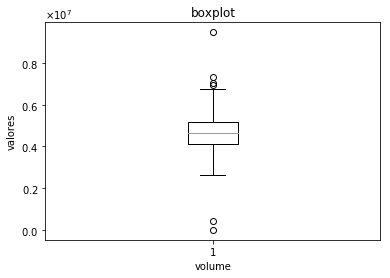

In [8]:
plt.boxplot(dataset['Volume'])
plt.title('boxplot')
plt.xlabel('volume')
plt.ylabel('valores')
plt.ticklabel_format(style='sci', axis='y', useMathText = True)

In [9]:
dataset['Maxima'].median()

101356.47

In [10]:
dataset['Minima'].mean()

98872.22999999997

-> Média truncada

In [11]:
from scipy import stats
m = stats.trim_mean(dataset['Minima'], 0.1)
print(m)

99109.76692307692


-> variancia e standard deviation

In [12]:
v = dataset['Cotacao'].var()
print(v)

15895285.259223964


In [13]:
d = dataset['Cotacao'].std()
print(v)

15895285.259223964


In [14]:
m = dataset['Cotacao'].mean()
print(m)

99674.05773437498


-> covariancia dos atributos, mas antes fazer uma standard scaler pra facilitar a visão e depois transforma de volta pra dataframe pandas

#### correlation shows us the relationship between the two variables and how are they related while covariance shows us how the two variables vary from each other.

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset_cov = sc.fit_transform(dataset)
dataset_cov = pd.DataFrame(dataset_cov)
dataset_cov.cov()

,0,1,2,3,4,5
0,1.007874,0.996976,0.993403,0.132621,0.131512,-0.011306
1,0.996976,1.007874,0.997884,0.023873,0.022297,-0.043467
2,0.993403,0.997884,1.007874,-0.008329,-0.008162,0.016674
3,0.132621,0.023873,-0.008329,1.007874,1.006954,-0.004670
4,0.131512,0.022297,-0.008162,1.006954,1.007874,-0.004580
5,-0.011306,-0.043467,0.016674,-0.004670,-0.004580,1.007874


-> plotting the graph may be easier to observe the correlation

In [16]:
corr = dataset.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,Cotacao,Minima,Maxima,Variacao,Variacao (%),Volume
Cotacao,1,0.989187,0.985642,0.131585,0.130485,-0.0112172
Minima,0.989187,1,0.990088,0.0236869,0.0221224,-0.0431274
Maxima,0.985642,0.990088,1,-0.00826439,-0.00809839,0.0165437
Variacao,0.131585,0.0236869,-0.00826439,1,0.999087,-0.00463366
Variacao (%),0.130485,0.0221224,-0.00809839,0.999087,1,-0.00454415
Volume,-0.0112172,-0.0431274,0.0165437,-0.00463366,-0.00454415,1


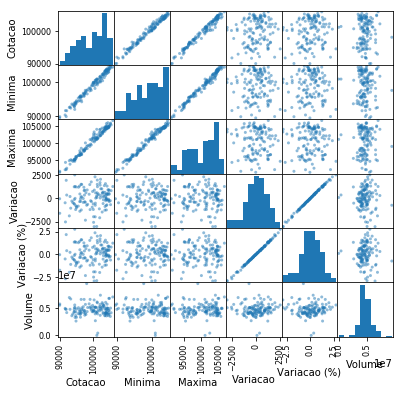

In [17]:
pd.plotting.scatter_matrix(dataset, figsize=(6, 6))
plt.show()

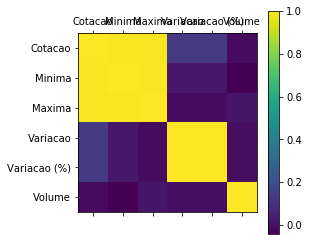

In [18]:
plt.matshow(dataset.corr())
plt.xticks(range(len(dataset.columns)), dataset.columns)
plt.yticks(range(len(dataset.columns)), dataset.columns)
plt.colorbar()
plt.show()